In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

# for AUC

In [5]:
results = pd.read_csv('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/signal_background/BDT_results.txt', delimiter=';',header=None)

In [6]:
df = pd.concat([results[0],results[1].str.split(',', expand=True)], ignore_index=True, axis=1)
df.columns = ['config', 'vbfH', 'ztt', 'fakes' ,'ggH']

In [14]:
df.drop_duplicates(subset='config', keep="last")

,config,vbfH,ztt,fakes,ggH
1,with_iso,0.8747000139470444,0.9260055044256583,0.9777197053613633,0.8289196558599525
2,with_aco_angle_1,0.8811865191696504,0.9251716134073215,0.9770813023761515,0.835336523202512
3,base,0.8736646050735954,0.921438701583077,0.9589589473341383,0.8259396004944421
4,all,0.8786834134863424,0.9191349071512385,0.977822110567322,0.8311469399399273


In [13]:
df[df.config=='with_iso']

,config,vbfH,ztt,fakes,ggH
1,with_iso,0.8747000139470444,0.9260055044256583,0.9777197053613633,0.8289196558599525


# for CM

In [26]:
def plot_confusion_matrix(y_test, y_pred, classes, figname, w_test=None, normalise_by_col=False, normalise_by_row=False, cmap=plt.cm.Blues):
    if w_test is not None: cm = confusion_matrix(y_test, y_pred, sample_weight=w_test, blue=False)
    else: cm = confusion_matrix(y_test, y_pred) 
    if normalise_by_col:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print ('Normalised efficiency confusion matrix')
    elif normalise_by_row:
        cm = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
        print ('Normalised purity confusion matrix')
    else:
        print ('Non-normalised confusion matrix')
    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.3f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if not blue:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment='center',
                     color='w' if cm[i, j] > thresh else 'k')
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='w' if cm[i, j] < thresh else 'k')

    plt.tight_layout(pad=1.4)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(figname)
    print ('Confusion matrix saved as {}'.format(figname))
    return cm

In [29]:
def plot_matrix(cm, classes, cmap=plt.cm.Blues, blue=False):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.3f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if blue:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment='center',
                     color='w' if cm[i, j] > thresh else 'k')
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='w' if cm[i, j] < thresh else 'k')
    plt.tight_layout(pad=1.4)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.savefig(figname)
#     print ('Confusion matrix saved as {}'.format(figname))
#     return cm

In [18]:
cm = pd.read_csv('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/signal_background/BDT_cm.txt', delimiter=';',header=None)

In [19]:
cm.columns = ['config', 'purity', 'efficiency']

In [21]:
cm = cm.drop_duplicates(subset='config', keep="last")

In [22]:
cm

,config,purity,efficiency
0,with_iso,"0.8145878290671382,0.24535000287060985,0.0626...","0.9486205507924499,0.0016014389132678283,0.00..."
2,with_aco_angle,"0.8165928563044397,0.2564261596237318,0.06119...","0.9491242315846948,0.0018674125303043897,0.00..."
3,base,"0.8125355464301214,0.2566007364182569,0.06350...","0.9481701489865924,0.0013072865545113398,0.00..."
4,all,"0.8171383263339735,0.22799123825664055,0.0667...","0.9406698591527809,0.0013741742899276452,0.00..."


In [23]:
base_purity = np.array([float(x) for x in cm.loc[cm['config'] == 'base'].purity.tolist()[0].split(',')]).reshape(4,4)
base_efficiency = np.array([float(x) for x in cm.loc[cm['config'] == 'base'].efficiency.tolist()[0].split(',')]).reshape(4,4)

In [24]:
base_purity

array([[0.81253555, 0.25660074, 0.06350822, 0.26391048],
       [0.00751969, 0.4263656 , 0.04129765, 0.01396844],
       [0.01275561, 0.16280881, 0.83134216, 0.13868123],
       [0.16718915, 0.15422485, 0.06385198, 0.58343985]])

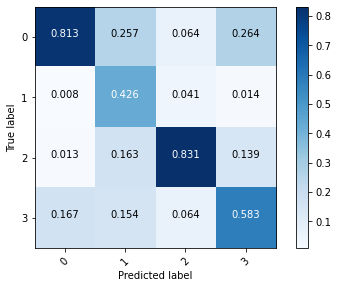

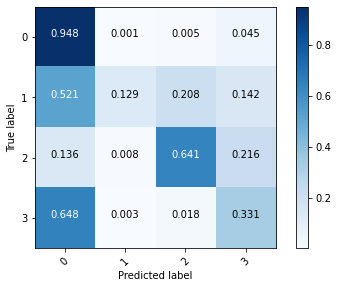

In [30]:
plot_matrix(base_purity, [0,1,2,3], blue=True)
plot_matrix(base_efficiency, [0,1,2,3], blue=True)

In [65]:
iso_purity = np.array([float(x) for x in cm.loc[cm['config'] == 'with_iso'].purity.tolist()[0].split(',')]).reshape(4,4)
iso_efficiency = np.array([float(x) for x in cm.loc[cm['config'] == 'with_iso'].efficiency.tolist()[0].split(',')]).reshape(4,4)

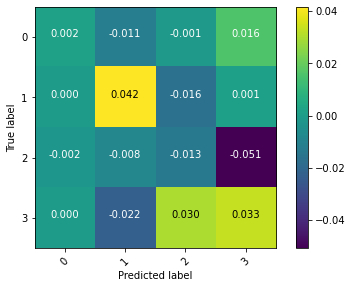

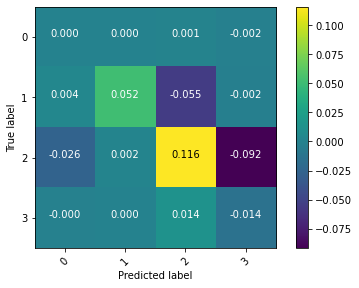

In [79]:
plot_matrix(iso_purity-base_purity, [0,1,2,3], cmap=plt.cm.viridis)
plot_matrix(iso_efficiency-base_efficiency, [0,1,2,3], cmap=plt.cm.viridis)

In [87]:
aco_purity = np.array([float(x) for x in cm.loc[cm['config'] == 'with_aco_angle'].purity.tolist()[0].split(',')]).reshape(4,4)
aco_efficiency = np.array([float(x) for x in cm.loc[cm['config'] == 'with_aco_angle'].efficiency.tolist()[0].split(',')]).reshape(4,4)

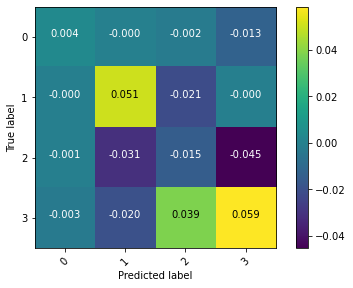

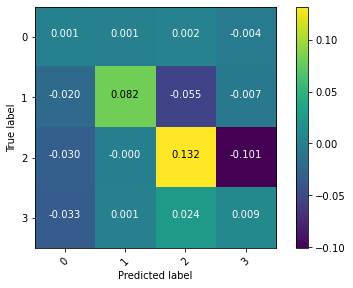

In [89]:
plot_matrix(aco_purity-base_purity, [0,1,2,3], cmap=plt.cm.viridis)
plot_matrix(aco_efficiency-base_efficiency, [0,1,2,3], cmap=plt.cm.viridis)